# **Customer Lifetime Value Prediction**

### **Business Problem**

Sebuah perusahaan bernama PT. ABC merupakan perusahaan yang bergerak di bidang asuransi kendaraan bermotor. PT ABC menyediakan fasilitas asuransi pada berbagai jenis kendaraan dimulai dari kendaraan kota, SUV, hingga kendaraan premium.  
  
  
Dengan banyaknya pesaing yang bermunculan, PT ABC harus bertahan dari gempuran para pesaing tersebut. Banyak strategi yang bisa dilakukan oleh PT ABC, salah satunya adalah menjaga relasi dengan pelanggan yang ada. Berdasarkan Marketing Metrics yang dikutip dari artikel Forbes *Don't Get Lazy About Your Client Relationships*, bisnis memiliki kemungkinan mencapai 60 - 70% untuk menjual produknya ke konsumen yang sudah ada dan hanya 5 - 20% pada konsumen baru. Oleh karena itu, PT ABC berniat untuk memaksimalkan potensial pasar yang sudah ada.  

    
Namun, tidak semua konsumen di PT ABC memiliki karakteristik dan kebutuhan yang sama. Oleh karena itu, PT ABC ingin menelusuri lebih lanjut karakteristik dan nilai konsumen agar PT ABC tidak salah dalam mengalokasikan sumber daya untuk pemasaran. Salah satu indikator yang ingin dicari adalah Customer Lifetime Value (CLV). Customer Lifetime Value adalah indikator yang menyatakan nilai suatu pelanggan terhadap merk tertentu. Indikator tersebut mampu membantu PT ABC untuk mengenali nilai pelanggannya dengan lebih baik, sehingga PT ABC mampu menyiapkan strategi pemasaran dan penawaran yang lebih baik. Dengan tujuan tersebut, PT ABC ingin melakukan prediksi nilai Customer Lifetime Value.

### **Data Understanding**

- Dataset dapat diambil pada link: https://drive.google.com/drive/folders/1Qk9VJXpVlYnZofzRmH5z15Kpi-5M8KOv
- Setiap baris merupakan data terkait tipe deal asuransi dari masing- masing pelanggan PT ABC

**Data Information**

| **Column** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Vehicle type that the insurance covered |
| Coverage | Object | Types of insurance coverage |
| Renew Offer Type| Object | Insurance renewal offer types |
| EmploymentStatus | Object | Customer's employment status |
| Marital Status | Object | Customer's marital status |
| Education | Object | Customer's level of education |
| Number of Policies | Float | Number of policies |
| Monthly Premium Auto | Float | The amount customer pay for coverage monthly |
| Total Claim Amount | Float | The sum payable at the maturity of an insurance policy |
| Income | Float | Customer's income |
| Customer Lifetime Value | Float | Customer Lifetime Value |

  
  
  

In [1]:
# Import Basic Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
data=pd.read_csv('data_customer_lifetime_value.csv')
data.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
# Create Dataset Duplicate
df1=data.copy()
df1.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


### **Exploratory Data Analysis**

In [4]:
data_cols=df1.select_dtypes(include='object')
for col in data_cols:
    print('''\033[1mValue Counts {}\033[0m'''.format(col))
    print(data_cols[col].value_counts())
    print()

Value Counts Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: Vehicle Class, dtype: int64

Value Counts Coverage
Basic       3477
Extended    1704
Premium      488
Name: Coverage, dtype: int64

Value Counts Renew Offer Type
Offer1    2292
Offer2    1835
Offer3     900
Offer4     642
Name: Renew Offer Type, dtype: int64

Value Counts EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: EmploymentStatus, dtype: int64

Value Counts Marital Status
Married     3305
Single      1514
Divorced     850
Name: Marital Status, dtype: int64

Value Counts Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: Education, dtype: int64



Di atas merupakan gambaran singkat karakteristik pelanggan asuransi PT ABC. Sebagian besar pelanggan menggunakan asuransi untuk mobil 4 pintu ; menggunakan Basic Coverage ; memilih Offer1 sebagai Renew Offer Type ; memiliki pekerjaan ; menikah ; dan merupakan lulusan sarjana.

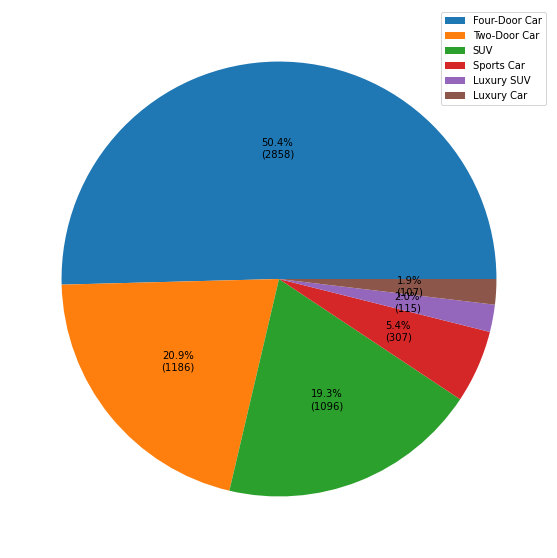

In [5]:
df_vc=df1['Vehicle Class'].value_counts()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(10,10))
plt.pie(df_vc,autopct=autopct_format(df_vc))
plt.legend(df_vc.index)

Berdasarkan pie chart di atas, setengah pelanggan PT ABC menggunakan asuransi untuk produk mobil 4 pintu (50.4%). Sebagian besar pelanggan lainnya menggunakan asuransi untuk produk mobil 2 pintu (20.9%) dan juga SUV (19.3%)

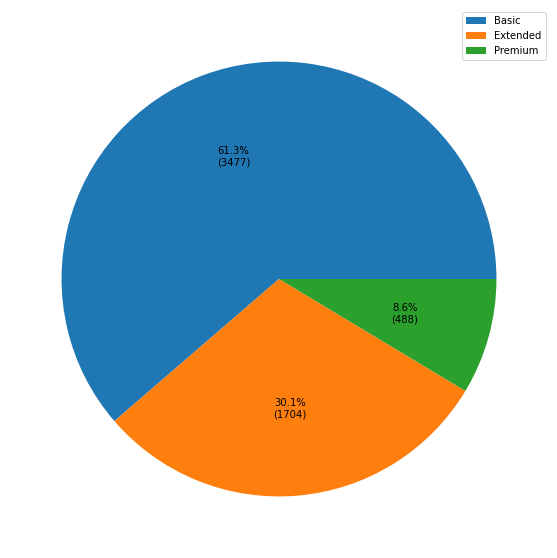

In [6]:
df_c=df1['Coverage'].value_counts()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(10,10))
plt.pie(df_c,autopct=autopct_format(df_c))
plt.legend(df_c.index)

Berdasarkan pie chart di atas, lebih dari setengah pelanggan PT ABC menggunakan Basic Coverage (61.3%) dan sebagian besar lainnya menggunakan Extended Coverage (30.1%).

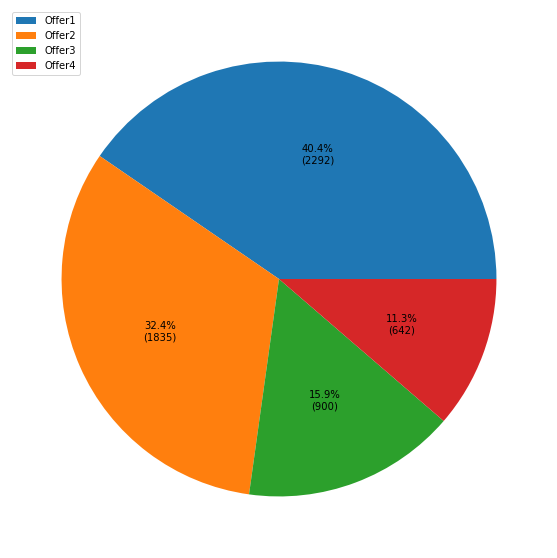

In [7]:
df_ro=df1['Renew Offer Type'].value_counts()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(10,10))
plt.pie(df_ro,autopct=autopct_format(df_ro))
plt.legend(df_ro.index)

Berdasarkan pie chart di atas, sebagian besar pelanggan PT ABC menggunakan Offer1 (40.4%) dan Offer2 (32.4%) sebagai Renew Offer Type

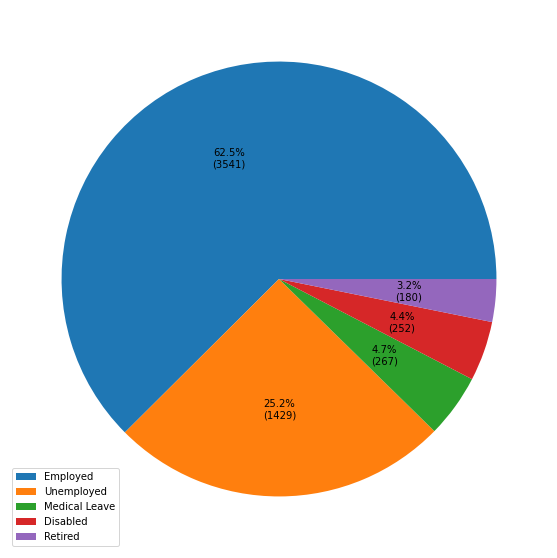

In [8]:
df_es=df1['EmploymentStatus'].value_counts()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(10,10))
plt.pie(df_es,autopct=autopct_format(df_es))
plt.legend(df_es.index)

Berdasarkan pie chart di atas, sebagian besar pelanggan PT ABC memiliki pekerjaan (62.5%). Minoritas yang signifikan lainnya merupakan pengganguran (25.2%).

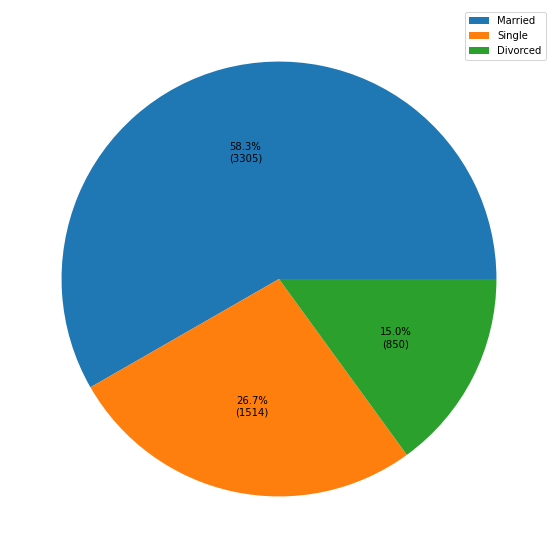

In [9]:
df_ms=df1['Marital Status'].value_counts()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(10,10))
plt.pie(df_ms,autopct=autopct_format(df_ms))
plt.legend(df_ms.index)

Berdasarkan pie chart di atas, sebagian besar pelanggan PT ABC telah menikah (58.3%).

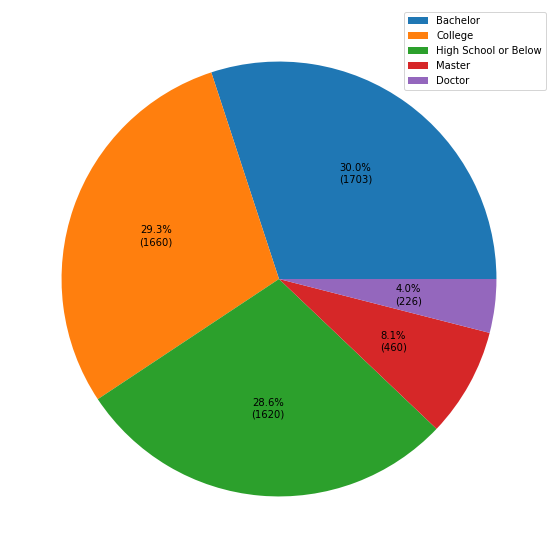

In [10]:
df_e=df1['Education'].value_counts()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(10,10))
plt.pie(df_e,autopct=autopct_format(df_e))
plt.legend(df_e.index)

Berdasarkan pie chart di atas, sebagian besar pelanggan PT ABC merupakan lulusan sarjana Bachelor (30.0%), sarjana College (29.3%), dan SMA ke bawah (28.6%).

In [11]:
# CLV Based on Customer's characteristics
data_clv = df1.select_dtypes("object")
CLV = df1["Customer Lifetime Value"]
data_clv = data_clv.join(CLV)
data_clv.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,2372.155492


In [12]:
data_clv.groupby(["Vehicle Class"]).mean().sort_values(by="Customer Lifetime Value", ascending=False)

,Customer Lifetime Value
Vehicle Class,
Luxury SUV,17730.511533
Luxury Car,16779.425415
Sports Car,11121.754994
SUV,10369.130854
Two-Door Car,6684.448077
Four-Door Car,6641.095206


Berdasarkan tabel di atas, terlihat pelanggan dengan asuransi mobil- mobil premium memiliki nilai rata-rata CLV yang paling tinggi.

In [13]:
data_clv.groupby(["Coverage"]).mean().sort_values(by="Customer Lifetime Value", ascending=False)

,Customer Lifetime Value
Coverage,
Premium,11193.719330
Extended,8839.082524
Basic,7189.251484


Berdasarkan tabel di atas, terlihat pelanggan dengan Coverage Premium memiliki nilai rata-rata CLV yang paling tinggi.

In [14]:
data_clv.groupby(["Renew Offer Type"]).mean().sort_values(by="Customer Lifetime Value", ascending=False)

,Customer Lifetime Value
Renew Offer Type,
Offer1,8856.048788
Offer3,7825.712667
Offer2,7342.326562
Offer4,7331.751712


Berdasarkan tabel di atas, terlihat pelanggan dengan Offer1 sebagai Renew Offer Type memiliki nilai rata-rata CLV yang paling tinggi.

In [15]:
data_clv.groupby(["EmploymentStatus"]).mean().sort_values(by="Customer Lifetime Value", ascending=False)

,Customer Lifetime Value
EmploymentStatus,
Employed,8216.722403
Medical Leave,8048.676877
Disabled,7776.810758
Unemployed,7684.433265
Retired,7422.982546


Berdasarkan tabel di atas, terlihat pelanggan yang memiliki pekerjaan dan yang sedang dalam cuti terkait medis memiliki nilai rata-rata CLV yang paling tinggi.

In [16]:
data_clv.groupby(["Marital Status"]).mean().sort_values(by="Customer Lifetime Value", ascending=False)

,Customer Lifetime Value
Marital Status,
Divorced,8137.936204
Married,8089.119462
Single,7839.876794


Berdasarkan tabel di atas, terlihat pelanggan yang sudah bercerai memiliki nilai rata-rata CLV yang paling tinggi.

In [17]:
data_clv.groupby(["Education"]).mean().sort_values(by="Customer Lifetime Value", ascending=False)

,Customer Lifetime Value
Education,
Master,8828.979265
High School or Below,8336.051642
Bachelor,7852.599042
College,7738.212365
Doctor,7686.797546


Berdasarkan tabel di atas, terlihat pelanggan yang memiliki gelar Master (lulusan S2) nilai rata-rata CLV yang paling tinggi.

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Monthly Premium Auto'>

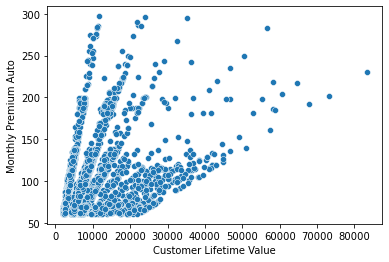

In [18]:
sns.scatterplot(x='Customer Lifetime Value',y='Monthly Premium Auto',data=df1)

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Total Claim Amount'>

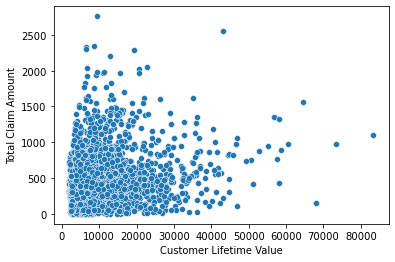

In [19]:
sns.scatterplot(x='Customer Lifetime Value',y='Total Claim Amount',data=df1)

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Income'>

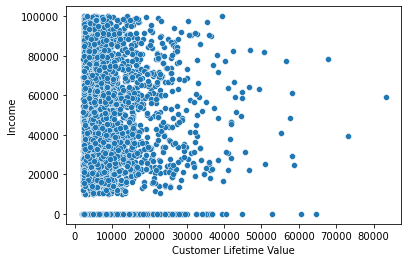

In [20]:
sns.scatterplot(x='Customer Lifetime Value',y='Income',data=df1)

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Number of Policies'>

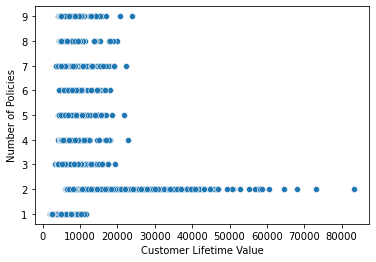

In [21]:
sns.scatterplot(x='Customer Lifetime Value',y='Number of Policies',data=df1)

Berdasarkan grafik- grafik scatterplot di atas, terlihat pola sebaran variabel- variabel numerik yang ada (Number of Policies, Income, Total Claim Amount, dan Monthly Premium Auto) dibandingkan Customer Lifetime Value cenderung acak. Namun, terlihat pola linier antara Monthly Premium Auto dan juga CLV.

In [22]:
# Check skewness
num_features = df1.dtypes[data.dtypes != 'object'].index
skewed_feat = df1[num_features].apply(lambda x: x.skew()).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feat,columns = ['skew'])
skewness

,skew
Customer Lifetime Value,3.061107
Monthly Premium Auto,2.113224
Total Claim Amount,1.659885
Number of Policies,1.240110
Income,0.282771


Skewness berguna untuk mendeteksi pola distribusi data numerik. Pola distribusi normal ditunjukkan oleh angka 0. Maka, distribusi tidak normal ditunjukkan oleh angka yang semakin menjauhi nilai 0.  
Pada tabel skewness di atas, terlihat hanya variabel **Income** yang menunjukkan distribusi normal sedangkan variabel lainnya menunjukkan nilai positif, yang mengindikasikan data skew ke kanan.

Text(0.5, 1.0, 'Customer Life Time Value Distribution')

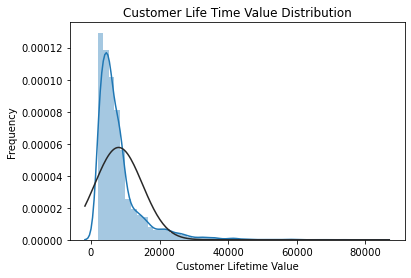

In [23]:
# Check CLV's skewness
from scipy import stats
from scipy.stats import norm,skew

sns.distplot(df1['Customer Lifetime Value'],fit=norm)

plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

Angka skewness CLV pada tabel sebelumnya juga dibuktikan oleh distribution plot di atas. Terlihat data CLV menunjukkan skew ke kanan atau positively skewed

### **Data Cleaning**

**Check Data Info and Missing Value**

In [24]:
print('\033[1m Data Info\033[0m')
print(df1.info())
print()
print('\033[1m Missing Values \033[0m')
print(df1.isna().sum())

 Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB
None

 Missing Values 
Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus

<AxesSubplot:>

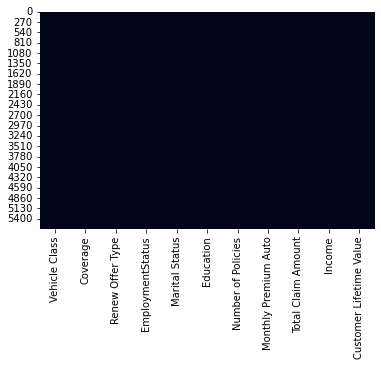

In [25]:
# Check Missing Value
sns.heatmap(df1.isnull(), cbar=False)

Berdasarkan info dataset di atas terlihat dataset terdiri dari 5669 baris. Selain itu, dataset tidak memiliki nilai kosong. Oleh karena itu, pengolahan data kosong tidak perlu dilakukan.

In [26]:
# Describing Data
df1.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Berdasarkan deskripsi data, terlihat tidak nilai minus. Namun, terlihat nilai 0 pada variabel **Income**.

In [27]:
# Check Suspicious Income Value
df1.loc[((data['Income']==0))]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7.0,64.0,307.200000,0.0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1.0,129.0,1178.950186,0.0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1.0,126.0,907.200000,0.0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5.0,95.0,456.000000,0.0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1.0,66.0,475.200000,0.0,2239.647297
...,...,...,...,...,...,...,...,...,...,...,...
5651,SUV,Extended,Offer1,Unemployed,Single,High School or Below,1.0,129.0,1486.410662,0.0,4502.867562
5652,Four-Door Car,Extended,Offer4,Unemployed,Married,Bachelor,5.0,95.0,456.000000,0.0,6661.744145
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9.0,67.0,132.443705,0.0,4927.707574
5660,Two-Door Car,Basic,Offer2,Unemployed,Single,College,7.0,72.0,391.636628,0.0,4936.888359


Berdasarkan observasi data lebih lanjut, terlihat nilai 0 pada variabel **Income** berasal dari para pelanggan yang tidak memiliki pekerjaan. Hal tersebut merupakan hal yang wajar, sehingga tidak perlu pengolahan data lebih lanjut

In [28]:
# Check Unique Values
df1.nunique()

Vehicle Class                 6
Coverage                      3
Renew Offer Type              4
EmploymentStatus              5
Marital Status                3
Education                     5
Number of Policies            9
Monthly Premium Auto        191
Total Claim Amount         3274
Income                     3625
Customer Lifetime Value    5049
dtype: int64

**Check Duplicates**

In [29]:
df1.loc[data.duplicated(), :]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


Berdasarkan observasi lebih lanjut, terlihat banyak sekali data duplikat. Namun, ada poin penting yang harus diperhatikan sebelum memproses data duplikat, yaitu **tidak adanya variabel pembeda antar pelanggan pada dataset ini**. Variabel yang dimaksud adalah data seperti **Customer's ID** dan sejenisnya. Sangat mungkin terdapat karakteristik yang sama antar pelanggan, baik itu dari sisi income maupun sisi lainnya. Oleh karena itu, pemrosesan data duplikat tidak dilakukan.

**Handling Outliers**

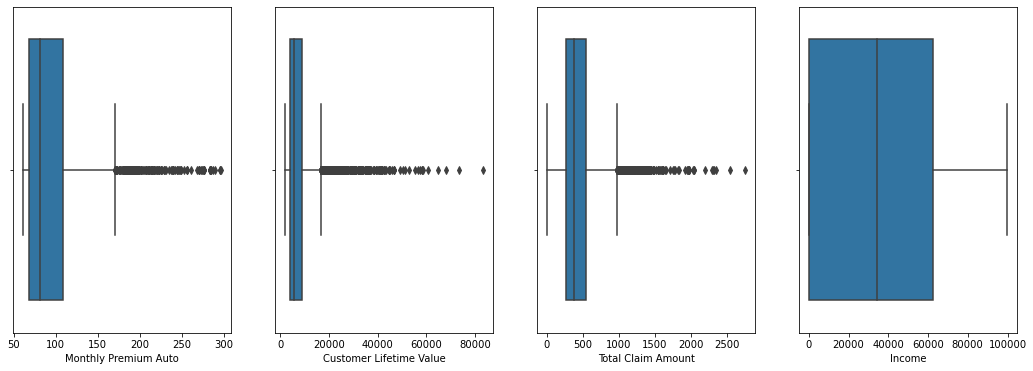

In [30]:
# Boxplot
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
sns.boxplot(ax=axes[0],x=data['Monthly Premium Auto'])
sns.boxplot(ax=axes[1],x=data['Customer Lifetime Value'])
sns.boxplot(ax=axes[2],x=data['Total Claim Amount'])
sns.boxplot(ax=axes[3],x=data['Income'])
plt.show()

In [31]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

In [32]:
# Kondisi outliers kolom Monthly Premium Auto
find_anomalies(df1['Monthly Premium Auto'])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


In [33]:
# Kondisi outliers kolom Customer Lifetime Value
find_anomalies(df1['Customer Lifetime Value'])

IQR: 5076.870325
limit_bawah: -3660.9609535
limit_atas: 16646.5203465


In [34]:
# Kondisi outliers kolom Total Claim Amount
find_anomalies(df1['Total Claim Amount'])

IQR: 283.053586
limit_bawah: -157.64783699999998
limit_atas: 974.566507


In [35]:
# Kondisi outliers kolom Income
find_anomalies(df1['Income'])

IQR: 62464.0
limit_bawah: -93696.0
limit_atas: 156160.0


In [36]:
# Cek outliers kolom Monthly Premium Auto
df1[df1['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']

275

In [37]:
# Cek outliers kolom Customer Lifetime Value
df1[df1['Customer Lifetime Value'] > 16646.5203465].count()['Customer Lifetime Value']

499

In [38]:
# Cek outliers kolom Total Claim Amount
df1[df1['Total Claim Amount'] > 974.566507].count()['Total Claim Amount']

265

In [39]:
# Cek outliers kolom Income
df1[df1['Income'] > 156160.0].count()['Income']

0

Outliers atau data pencilan dapat dilihat melalui boxplot dan hitungan outliers seperti di atas.  
  
Dari boxplot di atas, terlihat variabel Monthly Premium Auto, Customer Lifetime Value, dan Total Claim Amount cenderung positively skewed dan juga memiliki banyak outliers. Selain dari boxplot, berdasarkan hitungan outliers, terdapat banyak data outliers pada kolom Monthly Premium Auto, Customer Lifetime Value, dan Total Claim Amount.  
  
Outliers memang dapat menyebabkan data menjadi bias, namun, sebelum melakukan pengolahan data, ada beberapa poin yang harus diperhatikan. Pertama, **jumlah outlier pada dataset ini cenderung banyak**. Bahkan pada kolom Customer Lifetime Value, terdapat 499 data yang melebihi limit atas. Kedua, **jumlah dataset cenderung sedikit bila dibandingkan dengan jumlah outlier-nya**. Jumlah baris pada dataset ini hanya 5669 baris sedangkan jumlah outlier kolom Customer Lifetime Value sudah mencakup 8% dari total dataset, di luar dari data pada kolom lain. Hal tersebut bisa mempengaruhi kualitas data karena nantinya data yang diolah menjadi sedikit.  
  
Oleh karena itu, outliers pada dataset ini akan dianggap sebagai bagian dari analisis. Hal tersebut menggambarkan kondisi pelanggan yang memang cukup beragam, sehingga pengolahan data outliers tidak dilakukan.  

Text(0.5, 1.0, 'Correlation Matrix')

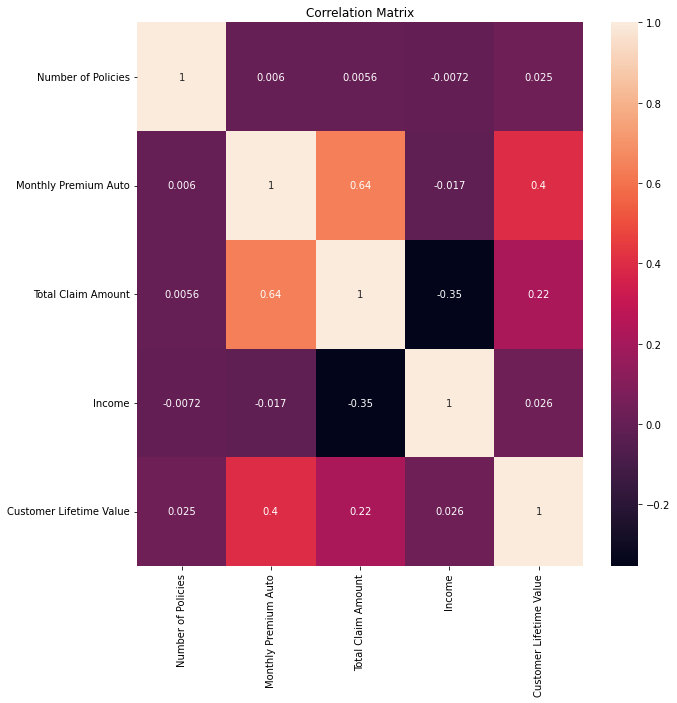

In [40]:
# Correlation Matrix
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')

Berdasarkan matrix korelasi di atas, sebagian besar komponen dari dataset cenderung memiliki korelasi lemah. Pengecualian terlihat pada Monthly Premium Auto dan Total Claim Amount. Hubungan antar kedua variabel tersebut adalah positif, yang menandakan semakin besar nilai Monthly Premium Auto maka akan semakin besar pula nilai Total Claim Amount.

### **Modelling**

In [41]:
# Import library
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

In [42]:
# Encoding
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Coverage', 'Marital Status','EmploymentStatus','Education','Renew Offer Type']),
    ('Binary', ce.BinaryEncoder(), ['Vehicle Class'])
], remainder='passthrough')

**Splitting Data**

In [43]:
# Splitting Data
X = df1.drop(['Customer Lifetime Value'], axis=1)
y = df1['Customer Lifetime Value']

In [44]:
# Train Test Split
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Benchmarking Model**

In [45]:
# Pilih algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Scaling data
scaler = RobustScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-6198.06314557 -6885.99359327 -6676.08137845 -5957.9491641
 -6534.64240312] LinearRegression()
[-3842.92845588 -4120.46847834 -3962.2867466  -3850.96810878
 -4066.7232334 ] LinearRegression()
[-0.59982575 -0.59202072 -0.60459144 -0.6174399  -0.58103025] LinearRegression()
[-6307.16438895 -7096.10155816 -6830.95249331 -6318.47913106
 -6441.13554464] KNeighborsRegressor()
[-3803.74844457 -4033.29753968 -3914.04764415 -3722.29548364
 -3898.00598344] KNeighborsRegressor()
[-0.59310169 -0.54262136 -0.59316739 -0.5599193  -0.54179554] KNeighborsRegressor()
[-5728.67464872 -5228.02814933 -5038.01803797 -4772.07126982
 -4852.51026469] DecisionTreeRegressor(random_state=42)
[-1967.94475769 -1764.84378339 -1636.33019002 -1599.80211144
 -1611.64413825] DecisionTreeRegressor(random_state=42)
[-0.14519269 -0.11859489 -0.1121256  -0.11927422 -0.11829942] DecisionTreeRegressor(random_state=42)
[-3978.73669183 -4315.47004924 -4211.54724082 -3534.50933324
 -3624.38364205] RandomForestRegressor(random_

In [46]:
# Evaluasi metrik
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-6450.545937,332.851995,-3968.675005,111.680465,-0.598982,0.012195
1,KNN Regressor,-6598.766623,312.951375,-3874.279019,105.361245,-0.566121,0.022986
2,DecisionTree Regressor,-5123.860474,341.000468,-1716.112996,138.997256,-0.122697,0.011539
3,RandomForest Regressor,-3932.929391,309.839504,-1517.197272,83.543476,-0.110871,0.005603
4,XGBoost Regressor,-4062.778795,362.887612,-1921.804693,45.933331,-0.200898,0.008070


Berdasarkan hasil metrik di atas, terdapat 3 model yang memiliki nilai error yang paling kecil, yaitu Decision Tree, Random Forest, dan XGBoost.  
- Model XGBoost memiliki nilai RMSE yang paling kecil setelah Random Forest.
- Model Decision Tree memiliki nilai MAE yang kecil, kedua terkecil setelah Random Forest.  
- Dari semua metrik yang ada, Random Forest memiliki nilai yang paling baik (Nilai RMSE, MAE, dan MAPE yang terkecil)

**Predict to Test Set with Chosen Model**

In [47]:
# Benchmarking model terbaik
models = {
    'XGB': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []
rsq=[]

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    rsq.append(r2_score(y_test,y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape,'R-Squared':rsq}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE,R-Squared
XGB,3958.676204,1902.617218,0.200027,0.632836
RandomForest,3772.481867,1506.537090,0.112370,0.666562
DecisionTree,5042.715970,1726.613022,0.127646,0.404215


Pada prediksi pada test set kali ini, ditambah metrik baru, yaitu R-Squared.  
- Berdasarkan evaluasi metrik, model Random Forest merupakan nilai terbaik, dengan nilai error terkecil yang digambarkan oleh RMSE, MAE, dan MAPE serta nilai R-Squared yang paling besar

**Hyperparameter Tuning**  
  
Sebagai tahapan akhir, akan dilakukan hyperparameter tuning kepada model benchmark yang dipilih, yaitu model Random Forest. Untuk parameter yang bisa dituning dapat merujuk pada https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#:~:text=A%20random%20forest%20regressor.,accuracy%20and%20control%20over%2Dfitting.

In [48]:
# Hyperparameter tuning
n_estimators = list(np.arange(10, 100))
max_depth=[int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split=[2, 5, 10]
min_samples_leaf=[1, 3, 4]
max_features=['auto', 'sqrt','log2']
bootstrap = [True, False]

hyperparam_rf = {
    'model__n_estimators': n_estimators, 
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__max_features': max_features,
    'model__bootstrap': bootstrap
}

In [49]:
rf = RandomForestRegressor(random_state=42)
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', rf)
        ])
crossval = KFold(n_splits=5, shuffle=True, random_state=42)
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_rf,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 42  
)

In [50]:
# Fitting data
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Coverage',
                                                                                'Marital '
                                                                                'Status',
                                                                                'EmploymentStatus',
                                                                                'Education',
                              

In [51]:
# Melihat hasil tuning
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__bootstrap,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
34,1.184976,0.044446,0.044803,0.004654,57,2,3,auto,20,True,...,76.286937,3,-0.121004,-0.111476,-0.107224,-0.109804,-0.113566,-0.112615,0.004681,4
25,1.364640,0.019203,0.045608,0.003205,69,2,3,auto,90,True,...,79.686978,4,-0.122001,-0.111790,-0.106768,-0.108867,-0.113236,-0.112533,0.005241,2
17,1.044016,0.024918,0.036822,0.001583,59,10,4,auto,10,True,...,82.226763,8,-0.124446,-0.117825,-0.108872,-0.113328,-0.116072,-0.116109,0.005149,15
28,0.783194,0.011145,0.033613,0.004076,40,10,4,auto,120,True,...,84.947100,7,-0.122614,-0.117450,-0.108196,-0.112875,-0.115898,-0.115407,0.004791,13
20,0.260836,0.006856,0.024006,0.000005,11,10,3,auto,30,True,...,75.479500,5,-0.123125,-0.113112,-0.107591,-0.111893,-0.114928,-0.114130,0.005106,5


In [52]:
# Cek skor dan params terbaik
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Best_score: -3910.725975391083
Best_params: {'model__n_estimators': 57, 'model__min_samples_split': 2, 'model__min_samples_leaf': 3, 'model__max_features': 'auto', 'model__max_depth': 20, 'model__bootstrap': True}


**Predict to Test Set with Tuned Model**

In [53]:
model = {'RandomForestTuning': RandomForestRegressor(random_state=42)}

rf_tuning = random_rf.best_estimator_

rf_tuning.fit(X_train, y_train)

y_pred_rf_tuning = rf_tuning.predict(X_test)

rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
rsqrt_rf_tuning=r2_score(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning,'R-Squared':rsqrt_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R-Squared
RandomForestTuning,3723.808818,1530.06725,0.113282,0.675111


**Performance Comparison**

In [54]:
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,MAPE,R-Squared
RandomForest,3772.481867,1506.53709,0.11237,0.666562


Terdapat perbedaan performa model Random Forest sebelum tuning dan setelah tuning.  
- Nilai RMSE pada model Random Forest setelah tuning terlihat menurun dibandingkan dengan model sebelum tuning  
- Nilai MAE pada model Random Forest setelah tuning terlihat meningkat dibandingkan dengan model sebelum tuning  
- Nilai MAP pada model Random Forest setelah tuning terlihat meningkat tipis dibandingkan dengan model sebelum tuning  
- Nilai R-Squared pada model Random Forest setelah tuning terlihat meningkat dibandingkan dengan model sebelum tuning  
  
Dengan pertimbangan adanya peningkatan nilai R-Squared, yang berarti performa model dalam menjelaskan keadaan data lebih baik disertai penurunan nilai RMSE disertai kenaikan nilai MAPE yang cenderung kecil, maka akan dipilih model Random Forest yang sudah dilakukan hyperparameter tuning.  

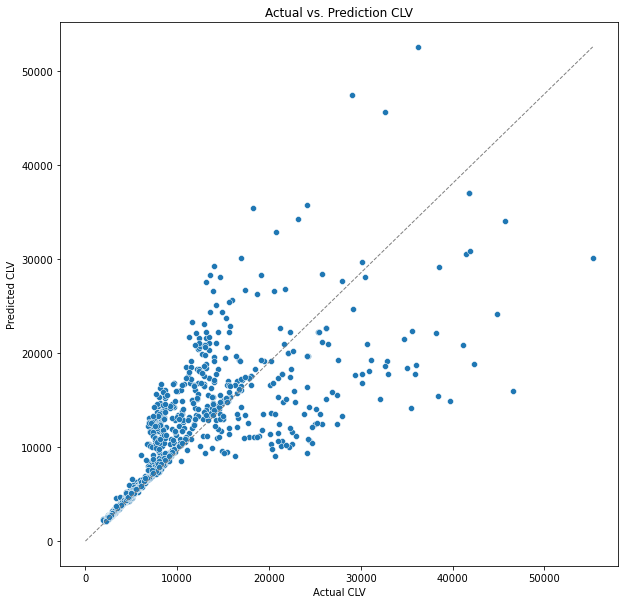

In [55]:
# Actual vs Prediction
plt.figure(figsize=(10, 10))
plt.plot([0, max(y_test)], [0, max(y_pred_rf_tuning)], color='gray', lw=1, linestyle='--')
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='Actual vs. Prediction CLV', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV');

Model terlihat dapat memprediksi dengan baik pada angka CLV yang rendah walaupun ada kecenderungan terjadinya overestimate (angka berada di atas garis diagonal). Namun seiring meningkatnya angka CLV, pola angka mulai acak (terjadinya overestimation dan underestimation).  
  
Walaupun begitu, berdasarkan nilai MAPE yang didapat, yaitu sekitar 11.3%, maka model ini masih dapat digunakan. Contoh kasus lainnya seperti pada Jablecka (2020) yang mendapatkan nilai MAPE di kisaran 15 - 30%.

*Reference: Jablecka, M (2020). Modelling CLV in the Insurance Industry Using Deep Learning Methods*

**Features Importance**

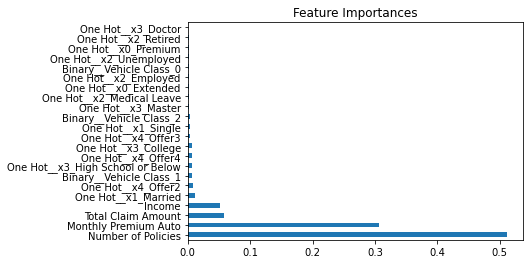

In [56]:
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

Pada grafis feature importance, terlihat variabel Number of Policies dan Monthly Premium Auto merupakan dua variabel yang paling berpengaruh terhadap nilai CLV. Variabel Total Claim Amount dan Income juga memiliki sedikit pengaruh terhadap nilai CLV. 
  

Hal yang menarik dari grafis feature importance ini adalah demografi pelanggan dan juga kendaraan yang diasuransikan tidak berpengaruh terhadap nilai CLV.

### **Conclusion**

Berdasarkan hasil evaluasi model, maka pada kasus ini, model yang paling optimal untuk digunakan untuk memprediksi nilai CLV adalah model Random Forest setelah dilakukan hyperparameter tuning.  
  
Dari semua variabel yang ada, variabel Number of Policies dan Monthly Premium Auto merupakan variabel yang paling berpengaruh pada nilai CLV.

### **Recommendation**

Beberapa rekomendasi yang dapat diberikan untuk PT ABC adalah:  
- Dalam strategi pemasarannya, sebaiknya PT ABC aktif mempromosikan paket- paket polis asuransi yang atraktif bagi konsumen, terutama pada konsumen loyal yang terdaftar pada banyak polis, mengingat variabel Number of Policies merupakan variabel yang paling berpengaruh terhadap nilai CLV. Dengan menawarkan paket- paket polis asuransi yang optimal, PT ABC memiliki potensial untuk meraih konsumen- konsumen yang bernilai. PT ABC bisa menawarkan berbagai macam benefit bila diperlukan.  
- Karena nilai Monthly Premium Auto atau premi bulanan cukup penting, maka sebaiknya PT ABC menawarkan premi bulanan yang kompetitif dengan kontrak yang jelas.  
- Total claim amount juga menjadi komponen penting pada nilai CLV. PT ABC dapat memastikan pelanggan bahwa track record perusahaan dalam membayar klaim sangat baik.  
- Perusahaan dapat melakukan strategi pemasaran produk pada pelanggan berdasarkan tingkat penghasilannya, mengingat variabel income cukup berpengaruh pada nilai CLV.  
- PT ABC dapat meningkatkan kualitas database pelanggan, dengan menambahkan kolom Customer's ID. Hal ini diperlukan agar dapat mengantisipasi kesalahan input dan juga mampu membuat personalisasi pelanggan menjadi lebih baik.

Beberapa rekomendasi untuk analisis lebih lanjut adalah:  
- Perlu dilakukan penambahan database pelanggan untuk kedepannya, dikarenakan nilai R-Squared yang cenderung rendah.  
- Mengingat variabel Number of Policies sangat berpengaruh terhadap CLV, ada baiknya dilakukan analisis lanjutan yang menggolongkan produk polis asuransi yang paling memberikan keuntungan bagi perusahaan. Hal tersebut dibutuhkan agar perusahaan dapat membuat paket asuransi yang tepat bagi pelanggan.  
- Dikarenakan variabel Monthly Premium Auto cukup penting, dibutuhkan analisis lanjutan kepada pelanggan agar PT ABC bisa lebih selektif dalam memilih pelanggan agar tidak terjadi penunggakan premi.  
- Merujuk pada Fang et al (2016), ada baiknya menambahkan beberapa variabel tambahan pada dataset, seperti jenis pembayaran asuransi (bulanan, tahunan, dsb), dan juga asal pelanggan bila ada.

**Save Model**

In [57]:
import pickle

# Model Pickling
random_rf.best_estimator_.fit(X,y)
filename = 'Model Final CLV.sav'
pickle.dump(random_rf.best_estimator_,open(filename,'wb'))

# load model
filename = 'Model Final CLV.sav'
loaded_model = pickle.load(open(filename,'rb'))

In [58]:
loaded_model.predict(X_test)

array([15424.34171387,  5533.72543344,  9439.3540107 , ...,
        2773.31319393,  2538.80512022, 12028.15545689])